<a href="https://colab.research.google.com/github/djmalice/GenAInotebooks/blob/main/MyCopy_LLM_for_Devs_Week_2_Introduction_to_Retrieval_Augmented_Generation_(RAG)_Experiment_Notebook_(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🥅 Goal

In this notebook, we'll undertake a series of experiments to understand and explore the concepts and techniques behind Retrieval-Augmented Generation.

To get started, make a copy of this notebook in your Google Drive and add your own code to capture your explorations and findings.

As you work through the experiments, choose one topic that particularly interests you and dive deeper into it. Prepare a concise lightning talk on your chosen topic to present during Week 3.

You do not have to deep dive into every experiement. Pick one and explore it more deeply. Prioritize finishing and deploying the assignment at the bottom of the notebook so you get more experience deploying a RAG-based LLM application.

The goal is to gain a solid understanding of Retrieval-Augmented Generation and share your insights with others in Discord. Happy exploring!

# 🧪 Experiment 1: How do I choose my text splitter?

LangChain supports a number of [text splitters](https://python.langchain.com/docs/modules/data_connection/document_transformers/). As mentioned in the documentation, a recursive text splitting approach is the recommended way to start splitting text.

`RecursiveCharacterTextSplitter` starts with a specified separator and if the resulting chunks are too large or not ideal, it recursively tries other separators.

This adaptability ensures that the text is split into chunks that are more manageable and semantically meaningful, which is crucial for the effectiveness of RAG systems in retrieving relevant information.

Due to its recursive nature, this splitter can ensure that the overlap between chunks is contextually relevant. This is important in RAG systems where the context of the information can significantly influence the quality of the generated responses. The overlapping chunks help maintain continuity and context, which can be lost in simpler splitting methods.


In [ ]:
!pip install -q -U datasets langchain langchain_community langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.7/973.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
from datasets import load_dataset
from langchain.embeddings import CacheBackedEmbeddings
from langchain.schema.runnable import Runnable
from langchain.schema.runnable.config import RunnableConfig
from langchain.storage import LocalFileStore
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import CSVLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables.passthrough import RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

dataset = load_dataset("ShubhamChoksi/IMDB_Movies")
print(dataset['train'][0])

dataset_dict = dataset
dataset_dict["train"].to_csv("imdb.csv")

loader = CSVLoader(file_path="imdb.csv")
data = loader.load()

print(data[0])


Generating train split:   0%|          | 0/6591 [00:00<?, ? examples/s]

{'Name': 'First Knight', 'rating': 6.0, 'No_of_ratings': '77K', 'user': '226', 'critics': 54.0, 'Movie_Info': 'Mel Gibson was attached to this project at one stage, but chose to direct and star in Braveheart (1995) instead.,As Lancelot chases the horse a telephone pole is visible, with barbed wire around it.,King Arthur: May God grant us the wisdom to discover right, the will to choose it, and the strength to make it endure.,Featured in Siskel & Ebert: First Knight/Party Girl/Species/Batman: Mask of the Phantasm/Il Postino (1995),I am a regular Hollywood movie buff, and heavily rely on IMDb user ratings, before watching any movie than relying on any other sources, and I prefer to watch movies which are usually rated at least 7 out of 10.\n\nSo when I had a chance to see the movie First Knight, I was in a doubt whether to watch this movie with a low rating of 5.6/10, even with great actors like Sean Connery and Richard Gere, or to skip to some other movie.\n\nLuckily I decided to give i

Creating CSV from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

page_content='Name: First Knight\nrating: 6.0\nNo_of_ratings: 77K\nuser: 226\ncritics: 54.0\nMovie_Info: Mel Gibson was attached to this project at one stage, but chose to direct and star in Braveheart (1995) instead.,As Lancelot chases the horse a telephone pole is visible, with barbed wire around it.,King Arthur: May God grant us the wisdom to discover right, the will to choose it, and the strength to make it endure.,Featured in Siskel & Ebert: First Knight/Party Girl/Species/Batman: Mask of the Phantasm/Il Postino (1995),I am a regular Hollywood movie buff, and heavily rely on IMDb user ratings, before watching any movie than relying on any other sources, and I prefer to watch movies which are usually rated at least 7 out of 10.\n\nSo when I had a chance to see the movie First Knight, I was in a doubt whether to watch this movie with a low rating of 5.6/10, even with great actors like Sean Connery and Richard Gere, or to skip to some other movie.\n\nLuckily I decided to give it a sh

In [ ]:
!pip install -q -U llama_index


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.5 MB/s eta 0:00:00


**CharacterText Splitter**

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text = "This is the text I would like to chunk up. It is the example text for this exercise"
text_splitter = CharacterTextSplitter(chunk_size = 35, chunk_overlap=3, separator='', strip_whitespace=False)
text_splitter.create_documents([text])

[Document(page_content='This is the text I would like to ch'),
 Document(page_content=' chunk up. It is the example text f'),
 Document(page_content='t for this exercise')]

**SentenceSplitter**

In [ ]:
from llama_index.core.node_parser import SentenceSplitter
splitter = SentenceSplitter(
    chunk_size=200,
    chunk_overlap=15,
)
nodes = splitter.get_nodes_from_documents([Document(text)])


IndexError: list index out of range

**RecursiveCharacterTextSplitter**

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
# Split them

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100 # TODO: How do we create a text splitter with 1000 character chunks and 100 character overlap?
)

chunked_documents = text_splitter.split_documents(data)

**MarkdownTextSplitter**

In [ ]:
from langchain.text_splitter import MarkdownTextSplitter
splitter = MarkdownTextSplitter(chunk_size = 40, chunk_overlap=0)
markdown_text = """
# Fun in California

## Driving

Try driving on the 1 down to San Diego

### Food

Make sure to eat a burrito while you're there

## Hiking

Go to Yosemite
"""
splitter.create_documents([markdown_text])

[Document(page_content='# Fun in California\n\n## Driving'),
 Document(page_content='Try driving on the 1 down to San Diego'),
 Document(page_content='### Food'),
 Document(page_content="Make sure to eat a burrito while you're"),
 Document(page_content='there'),
 Document(page_content='## Hiking\n\nGo to Yosemite')]

**PythonSplitter**

In [ ]:
from langchain.text_splitter import PythonCodeTextSplitter
python_text = """
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

p1 = Person("John", 36)

for i in range(10):
    print (i)
"""
python_splitter = PythonCodeTextSplitter(chunk_size=100, chunk_overlap=0)
python_splitter.create_documents([python_text])

[Document(page_content='class Person:\n  def __init__(self, name, age):\n    self.name = name\n    self.age = age'),
 Document(page_content='p1 = Person("John", 36)\n\nfor i in range(10):\n    print (i)')]

**PDFTableSplitting**

In [ ]:
# Install Requirements
!apt-get -qq install poppler-utils tesseract-ocr
# Upgrade Pillow to latest version
%pip install -q --user --upgrade pillow
# Install Python Packages
%pip install -q unstructured["all-docs"]==0.12.5

Selecting previously unselected package poppler-utils.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.4_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.4) ...
Selecting previously unselected package tesseract-ocr-eng.
Preparing to unpack .../tesseract-ocr-eng_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-eng (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr-osd.
Preparing to unpack .../tesseract-ocr-osd_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-osd (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr.
Preparing to unpack .../tesseract-ocr_4.1.1-2.1build1_amd64.deb ...
Unpacking tesseract-ocr (4.1.1-2.1build1) ...
Setting up tesseract-ocr-eng (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-osd (1:4.00~git30-7274cfa-1.1) ...
Setting up poppler-utils (22.02.0-2ubuntu0.4) ...
Setting up tess

In [ ]:
import os
from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import elements_to_json

filename = "salesforce.pdf"

# Extracts the elements from the PDF
elements = partition_pdf(
    filename=filename,

    # Unstructured Helpers
    strategy="hi_res",
    infer_table_structure=True,
    model_name="yolox"
)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
elements

 ...]

In [ ]:
elements[50:60]

In [ ]:
elements[6].metadata.text_as_html

In [ ]:
display(*[(type(element), element.text) for element in elements[50:60]])

(unstructured.documents.elements.Text, '☐')

(unstructured.documents.elements.Text, '☐')

(unstructured.documents.elements.Header, 'Table of Contents')

(unstructured.documents.elements.Title, 'INDEX')

(unstructured.documents.elements.Title, 'PART I')

(unstructured.documents.elements.Table,
 "Item 1. Item 1A. Item 1B. Item 1C. Item 2. Item 3. Item 4. Item 4A. Item 5. Item 6. Item 7. Item 7A. Item 8. Item 9. Item 9A. Item 9B. Item 9C. Item 10. Item 11. Item 12. Item 13. Item 14. Business Risk Factors Unresolved Staff Comments Cybersecurity Properties Legal Proceedings Mine Safety Disclosures Information About Our Executive Officers PART II Market for Registrant's Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities Reserved Management's Discussion and Analysis of Financial Condition and Results of Operations Quantitative and Qualitative Disclosures about Market Risk Financial Statements Changes in and Disagreements with Accountants on Accounting and Financial Disclosure Controls and Procedures Other Information Disclosure Regarding Foreign Jurisdictions that Prevent Inspections PART III Directors, Executive Officers and Corporate Governance Executive Compensation Security Ownership of Certain Beneficia

(unstructured.documents.elements.Title, 'PART IV')

(unstructured.documents.elements.Table,
 'Exhibits and Financial Statement Schedules 10-K Summary Index to Exhibits Signatures 95 95 95 98')

(unstructured.documents.elements.Title, 'Item 15.')

(unstructured.documents.elements.Title, 'Item 16.')

**Multi-modal Splitting**

In [ ]:
import os
from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import elements_to_json

filename = "llava.pdf"

# Extracts the elements from the PDF
raw_pdf_elements = partition_pdf(
    filename=filename,

    # Using pdf format to find embedded image blocks
    extract_images_in_pdf=True,

    # Use layout model (YOLOX) to get bounding boxes (for tables) and find titles
    # Titles are any sub-section of the document
    infer_table_structure=True,

    # Post processing to aggregate text once we have the title
    chunking_strategy="by_title",
    # Chunking params to aggregate text blocks
    # Attempt to create a new chunk 3800 chars
    # Attempt to keep chunks > 2000 chars
    # Hard max on chunks
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path="pdfImages/",
)

In [ ]:
from langchain.schema.messages import HumanMessage
from google.colab import userdata
from PIL import Image
import base64
import io


def image_to_base64(image_path):
    with Image.open(image_path) as image:
        buffered = io.BytesIO()
        image.save(buffered, format=image.format)
        img_str = base64.b64encode(buffered.getvalue())
        return img_str.decode('utf-8')

image_str = image_to_base64("figures/figure-15-6.jpg")
openai_api_key = userdata.get("OPENAI_API_KEY")

chat = ChatOpenAI(model="gpt-4-vision-preview",
                  max_tokens=1024,
                  openai_api_key = openai_api_key)

msg = chat.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text" : "Please give a summary of the image provided. Be descriptive"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_str}"
                    },
                },
            ]
        )
    ]
)


In [ ]:
msg.content

'The image shows a baking tray with clumps of what appears to be cookie dough or a similar baked good arranged in a way that resembles a map of the world. The shapes on the tray imitate the various continents, with a rough representation of North and South America on the left, Europe and Africa in the center, and what could be parts of Asia and Australia on the right. Above this tray, there is a caption that reads, "Sometimes I just look at pictures of the earth from space and I marvel at how beautiful it all is." This caption is meant to be humorous, as the "pictures of the earth from space" are actually just the baked items arranged to look like a world map.'

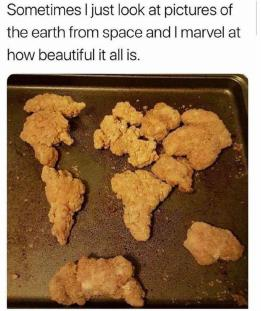

In [ ]:
Image.open("figures/figure-15-6.jpg")

### Semantic Chunking

In [ ]:
!pip install --quiet langchain_experimental langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.7/973.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
with open("pg.txt", "r") as f:
    text = f.read()



In [ ]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings
from google.colab import userdata

openai_api_key = userdata.get("OPENAI_API_KEY")
text_splitter = SemanticChunker(OpenAIEmbeddings(openai_api_key=openai_api_key))

docs = text_splitter.create_documents([text])
for i in range(0, 10):
    print(docs[i].page_content)

Till recently graduating seniors had two choices: get a job or go to grad school. I think there will increasingly be a third option: to start your own startup. But how common will that be? I'm sure the default will always be to get a job, but starting a startup could well become as popular as grad school. In the late 90s my professor friends used to complain that they couldn't get grad students, because all the undergrads were going to work for startups. I wouldn't be surprised if that situation returns, but with one difference: this time they'll be starting their own instead of going to work for other people's. The most ambitious students will at this point be asking: Why wait till you graduate? Why not start a startup while you're in college? In fact, why go to college at all? Why not start a startup instead? A year and a half ago I gave a talk where I said that the average age of the founders of Yahoo, Google, and Microsoft was 24, and that if grad students could start startups, why


# 🧪 Experiment 2: How do I know what `chunk_size` and `chunk_overlap` to choose?

[ChunkViz](https://chunkviz.up.railway.app/) is a nifty tool you can use to experiment with different `chunk_size` and `chunk_overlap`.

Questions

Experiment with different types of textual data (e.g., prose, HTML, Markdown, JSON).
* What do you notice?
* When do you notice a difference in performance based on how you set these parameters?

Experiment with different types of non-texual data (e.g., audio, video, images)
* How do you chunk non-textual data? What approaches and libaries exist?

# 🧪 Experiment 3: How do I choose an embedding model?

Research and experiment with different types of embedding models.

* How much do they cost?
* How do open source embedding models compare with paid embedding models?
* Are there any differences between stability? Latency?
* Do some embedding models perform better or a specific type of data?
* What types of customization do different embedding models offer?

# 🧪 Experiment 4: How much time does using `CachedBackedEmbeddings` save you?

Once the embedding is computed, it is stored in the cache for future use. This means that any subsequent request for the same text will retrieve the embedding directly from the cache, bypassing the computation step.

* How do we measure that this caching is working?
* Does it truly reduce the time for returning matching documents?
* What happens if we ask the question a different way?
* Do we still benefit from caching?
* How much do we have to change the query for it to miss the cache?

# 🧪 Experiment 5: Improve the performance of `Mr-TD/RAG-PDF-QnA-ChatBot`

 Clone the [Hugging Face space](https://huggingface.co/spaces/Mr-TD/RAG-PDF-QnA-ChatBot/tree/main) `Mr-TD/RAG-PDF-QnA-ChatBot` referenced in the Week 2 lecture and try to make it more performant.

# 🧪  Experiment 6: Implement RAG for Movie Recommendations using Haystack 2.0 or another library

There are several libraries available for implementing a Retrieval-Augmented Generation (RAG) system. Each has its own strengths and weaknesses.

[Hackstack 2.0](https://docs.haystack.deepset.ai/docs/intro) is known for being well-suited for production-quality large language models (LLMs), with features like:

- Support for a variety of document stores, retrieval methods, and LLMs
- Scalability to handle large datasets and high query volumes
- Customizable pipelines for query processing, retrieval, and generation
- Detailed documentation and active community support

On the other hand, libraries like LangChain have a reputation for being easier to get started with for rapid prototyping, but may not be as robust for production-scale LLM applications.

For this experiment, try implementing your movie recommendation RAG system using [Hackstack 2.0](https://docs.haystack.deepset.ai/docs/intro) or another library of your choice.

As you work with the selected library, ask yourself the following questions:

1. How easy is the library to set up and install?
2. What is the quality and completeness of the documentation?
3. Is the API well-designed, intuitive, and easy to learn?
4. How active and supportive is the library's community?
5. Does the library offer flexibility and customization options?
6. How well does it integrate with your existing data and models?
7. Are all essential aspects of usage covered in the documentation?

# 💻 Assignment: Deploy a RAG chatbot to production

## Deploying your project as a chatbot

Now that you have developed and tested your movie question answering system, the next step is to deploy it so that it can be accessed by users anywhere.

You will deploy to Hugging Face Spaces using [Chainlit](https://chainlit.io), a powerful tool for deploying LLM projects as interactive web applications.


## Getting started with [Chainlit](https://chainlit.io) and Hugging Face Spaces

[Chainlit](https://chainlit.io) is designed to make the deployment of machine learning models straightforward and accessible.

Here are some resources to help you get started with deploying your project:

1. **Explore Chainlit documentation**: Begin by exploring the [Chainlit Documentation](https://chainlit.io/docs). This resource provides comprehensive guidance on how to use Chainlit, from installation to deployment.

2. **Learn about Hugging Face Spaces**: Learn more about Hugging Face Spaces, which is a platform for hosting ML models and apps, by visiting [Hugging Face Spaces](https://huggingface.co/spaces). This platform integrates seamlessly with Chainlit, making it an ideal choice for deploying your chatbot.

3. **Browse example projects**: It can also be helpful to look at example projects on Hugging Face Spaces to see how others have structured their deployments. This can provide inspiration and practical insights for your own deployment.


### Github project url: https://github.com/djmalice/MovieChatBot/

## Deploying your chatbot

To deploy your RAG question answering system as a chatbot, follow these steps:

1. **Prepare your project** Create a folder for your project and ensure that it is organized and well-documented. This includes having clear code comments, a requirements.txt file for dependencies, and a README for instructions.

2. **Set up Chainlit** Install Chainlit on your local machine or development environment.

3. **Build and deploy your chatbot** Using the above resources, figure out how to deploy your chatbot to a Hugging Face Space.

### Hugging Face Spaces deployment: https://huggingface.co/spaces/chintansheth87/MovieChatBot

# 📝 Submission

Submit your experiment notebook for Week 2 using the form [here](https://docs.google.com/forms/d/1l935d2L3YN3Kj3ovNf3CKWB2EyxvDMkYY_sYte-NYWI/edit).

Please make sure sharing permissions are turned on for everyone with the link.

Note: In Week 3, we'll do lightning presentations where each student will share the results of their experiment.
